Keiana Dunn
Week 13
5/13/19
Using callbacks to save a set of running processes to reload them at a later time  at the last callback
Pima Indians - diabetes prediction
Neural Network for binary classification

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.5,input_shape=(8,)))
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save model to disk ############
# Save model structure as json
print('===================')
print('Saving model to disk')
print('===================')
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
#################################    
    
# Set up checkpointing
# Checking gives the ability to save a set of running processes to a image on a disk and later restart it from last checkpoint disk.
filepath = 'weights.best.hdh5'
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')
callbacks_list = [checkpoint]

history = model.fit(X,Y,validation_split=0.333,epochs=1000,verbose=0,callbacks=callbacks_list)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

#Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

/home/ktd2001/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Saving model to disk
Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_acc improved from -inf to 0.51562, saving model to weights.best.hdh5

Epoch 00002: val_acc improved from 0.51562 to 0.66797, saving model to weights.best.hdh5

Epoch 00003: val_acc improved from 0.66797 to 0.67578, saving model to weights.best.hdh5

Epoch 00004: val_acc did not improve from 0.67578

Epoch 00005: val_acc did not improve from 0.67578

Epoch 00006: val_acc improved from 0.67578 to 0.67969, saving model to weights.best.hdh5

Epoch 00007: val_acc did not improve from 0.67969

Epoch 00008: val_acc did not improve from 0.67969

Epoch 00009: val_acc did not improve from 0.67969

Epoch 00010: val_acc did not improve from 0.67969

Epoch 00011: val_acc improved from 0.67969 to 0.68359, saving model to weights.b

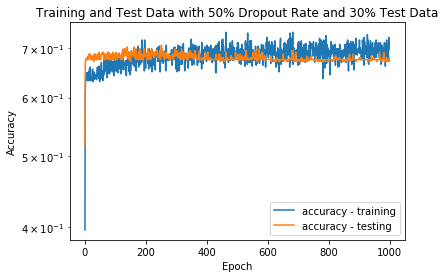

In [3]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test Data with 50% Dropout Rate and 30% Test Data')
plt.legend()
#plt.grid()
plt.show()

50% Dropout rate and 30% test yields a little noise. 

In [4]:

# create model (requires completion)
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.1,input_shape=(8,)))
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save model to disk ############
# Save model structure as json
print('===================')
print('Saving model to disk')
print('===================')
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
#################################    
    
# Set up checkpointing
filepath = 'weights.best.hdh5'

# Saving a snapshot so that it can restart from that point in case of failure. It does this by watches all 
# the files in a directory (recursively), and allows you to revert your directory to any point in the past 
# that you did a ‘commit’ to save your changes.
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max') 
# calling the checkpoint list
callbacks_list = [checkpoint]

# Training NN and using callback
history = model.fit(X,Y,validation_split=0.1,epochs=1000,verbose=0,callbacks=callbacks_list)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Saving model to disk

Epoch 00001: val_acc improved from -inf to 0.55844, saving model to weights.best.hdh5

Epoch 00002: val_acc improved from 0.55844 to 0.61039, saving model to weights.best.hdh5

Epoch 00003: val_acc did not improve from 0.61039

Epoch 00004: val_acc improved from 0.61039 to 0.62338, saving model to weights.best.hdh5

Epoch 00005: val_acc did not improve from 0.62338

Epoch 00006: val_acc did not improve from 0.62338

Epoch 00007: val_acc did not improve from 0.62338

Epoch 00008: val_acc did not improve from 0.62338

Epoch 00009: val_acc did not improve from 0.62338

Epoch 00010: val_acc did not improve from 0.62338

Epoch 00011: val_acc did not improve from 0.62338

Epoch 00012: val_acc did not improve from 0.62338

Epoch 00013: val_acc did not improve from 0.62338

Epoch 00014: val_acc did not improve from 0.62338

Epoch 00015: val_acc did not improve from 0.62338

Epoch 00016: val_acc did not improve from 0.62338

Epoch 00017: val_acc did not improve from 0.6233

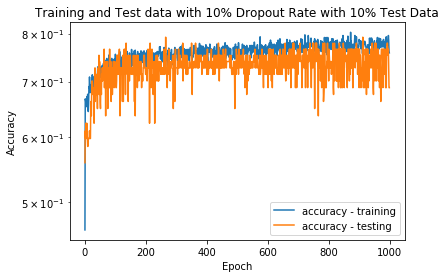

In [5]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test data with 10% Dropout Rate with 10% Test Data')
plt.legend()
#plt.grid()
plt.show()

10% Dropout rate and 10% test yields a more noise. 

In [6]:
# create model (requires completion)
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.2,input_shape=(8,)))
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save model to disk ############
# Save model structure as json
print('===================')
print('Saving model to disk')
print('===================')
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
#################################    
    
# Set up checkpointing

filepath = 'weights.best.hdh5'
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')
callbacks_list = [checkpoint]

history = model.fit(X,Y,validation_split=0.2,epochs=1000,verbose=0,callbacks=callbacks_list)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

#Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Saving model to disk

Epoch 00001: val_acc improved from -inf to 0.64286, saving model to weights.best.hdh5

Epoch 00002: val_acc did not improve from 0.64286

Epoch 00003: val_acc improved from 0.64286 to 0.64935, saving model to weights.best.hdh5

Epoch 00004: val_acc improved from 0.64935 to 0.64935, saving model to weights.best.hdh5

Epoch 00005: val_acc did not improve from 0.64935

Epoch 00006: val_acc did not improve from 0.64935

Epoch 00007: val_acc did not improve from 0.64935

Epoch 00008: val_acc did not improve from 0.64935

Epoch 00009: val_acc did not improve from 0.64935

Epoch 00010: val_acc did not improve from 0.64935

Epoch 00011: val_acc did not improve from 0.64935

Epoch 00012: val_acc improved from 0.64935 to 0.65584, saving model to weights.best.hdh5

Epoch 00013: val_acc did not improve from 0.65584

Epoch 00014: val_acc did not improve from 0.65584

Epoch 00015: val_acc did not improve from 0.65584

Epoch 00016: val_acc did not improve from 0.65584

Epoch 000

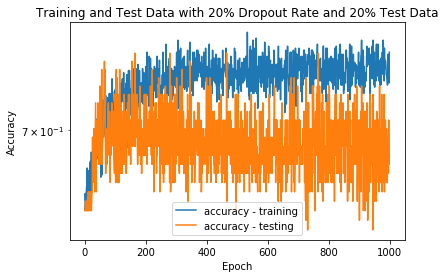

In [7]:
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test Data with 20% Dropout Rate and 20% Test Data')
plt.legend()
#plt.grid()
plt.show()

20% Dropout rate and 20% test data yields a lot more noise compared to the higher Dropout rate and Test data. 

In [8]:
# create model (requires completion)
model = Sequential()
# Input layer (with dropout)
model.add(Dropout(0.3,input_shape=(8,)))
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Save model to disk ############
# Save model structure as json
print('===================')
print('Saving model to disk')
print('===================')
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
#################################    
    
# Set up checkpointing

filepath = 'weights.best.hdh5'
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')
callbacks_list = [checkpoint]

history = model.fit(X,Y,validation_split=0.3,epochs=1000,verbose=0,callbacks=callbacks_list)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

#Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

Saving model to disk

Epoch 00001: val_acc improved from -inf to 0.65801, saving model to weights.best.hdh5

Epoch 00002: val_acc did not improve from 0.65801

Epoch 00003: val_acc did not improve from 0.65801

Epoch 00004: val_acc did not improve from 0.65801

Epoch 00005: val_acc did not improve from 0.65801

Epoch 00006: val_acc did not improve from 0.65801

Epoch 00007: val_acc did not improve from 0.65801

Epoch 00008: val_acc did not improve from 0.65801

Epoch 00009: val_acc did not improve from 0.65801

Epoch 00010: val_acc did not improve from 0.65801

Epoch 00011: val_acc did not improve from 0.65801

Epoch 00012: val_acc did not improve from 0.65801

Epoch 00013: val_acc improved from 0.65801 to 0.66667, saving model to weights.best.hdh5

Epoch 00014: val_acc did not improve from 0.66667

Epoch 00015: val_acc did not improve from 0.66667

Epoch 00016: val_acc did not improve from 0.66667

Epoch 00017: val_acc did not improve from 0.66667

Epoch 00018: val_acc improved from 0

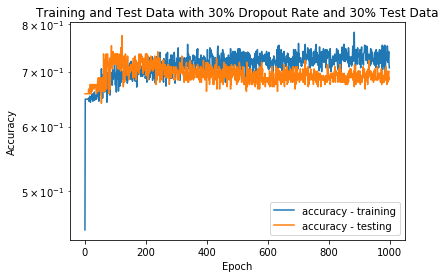

In [9]:
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test Data with 30% Dropout Rate and 30% Test Data')
plt.legend()
#plt.grid()
plt.show()

30% Dropout Rate and 30% test data yields less noise that previous graph with lower Dropout rate and test data

# Reflection

The higher the Dropout rate and test data used, the less noise is produced. 